In [1]:
import geojson
import geopandas
import osmnx

In [67]:
with open('/Users/samyounes/Downloads/precincts-with-results.geojson') as f:
    gjdf=geopandas.read_file(f)



In [68]:
gjdf

,GEOID,votes_dem,votes_rep,votes_total,votes_per_sqkm,pct_dem_lead,geometry
0,05047-1-A (Oz Wd 1),79.0,279.0,366.0,54.2,-54.6,"MULTIPOLYGON (((-93.88536 35.48376, -93.88405 ..."
1,05149-11 - Dutch Creek,6.0,31.0,37.0,0.3,-67.6,"POLYGON ((-93.56912 34.94763, -93.57895 34.947..."
2,05081-Franklin Township,53.0,383.0,450.0,3.8,-73.3,"POLYGON ((-93.98600 33.74165, -93.98546 33.741..."
3,05027-McNeil City,64.0,68.0,138.0,41.9,-2.9,"POLYGON ((-93.19438 33.34718, -93.19373 33.347..."
4,05027-Taylor Township,67.0,342.0,423.0,1.7,-65.0,"POLYGON ((-93.45912 33.01858, -93.46310 33.018..."
...,...,...,...,...,...,...,...
146591,56007-01-01,173.0,300.0,486.0,21.8,-26.1,"POLYGON ((-107.25933 41.77505, -107.25884 41.7..."
146592,56045-05-01,70.0,390.0,480.0,259.5,-66.7,"POLYGON ((-104.19354 43.85788, -104.19407 43.8..."
146593,56045-05-02,67.0,376.0,454.0,66.5,-68.1,"POLYGON ((-104.24595 43.85045, -104.24734 43.8..."
146594,56045-05-03,63.0,419.0,498.0,141.4,-71.5,"POLYGON ((-104.19009 43.84017, -104.19199 43.8..."


In [235]:
import numpy as np
from shapely.geometry import Polygon, MultiPolygon

features=(gjdf[['GEOID','geometry','pct_dem_lead']])
avg_coords=[]
names=[]
parties=[]

for pct in features['pct_dem_lead']:
    if pct>=-15 and pct<=15:
        parties.append('nothing')
    elif pct >= 0:
        parties.append('dem')
    else:
        parties.append('rep')

for i in range(len(features['geometry'])):
    names.append(features['GEOID'][i])
    feature=features['geometry'][i]
    if(isinstance(feature,Polygon)):
        coords = list(feature.exterior.coords)
        lons,lats = np.array(coords).T[:2]
        average = (np.mean(lons),np.mean(lats))
        avg_coords.append(average)
    if(isinstance(feature,MultiPolygon)):
        #all_coords=[]
        for i in range(len(feature.geoms)):
          # all_coords.append(list(feature.geoms[i].exterior.coords))
            coords = list(feature.geoms[i].exterior.coords)
        lons,lats=np.array(coords).T[:2]
        average=(np.mean(lons),np.mean(lats))
        avg_coords.append(average)

#making dictionary of GEOID and average coordinates
dic={}
for i in range(len(names)):
    dic[names[i]]=(avg_coords[i][1], avg_coords[i][0])

party_dic={}
for i in range(len(names)):
    party_dic[names[i]]=parties[i]

        

In [220]:
from scipy.spatial import KDTree
import numpy as np

coords=np.array([lats,lons])

coords = np.array(list(zip(list(coords[0]),list(coords[1]))))

# Assuming you have a list of latitude/longitude pairs
coordinates = coords

# Convert latitude/longitude to radians for all coordinates
coordinates_rad = np.radians(coordinates)

# Construct a KD-tree
tree = KDTree(coordinates_rad)

# Query the KD-tree for the 5 closest points for each point
k = 6  # We use 6 because the query includes the original point
distances, indices = tree.query(coordinates_rad, k=k)

# For each coordinate, find the indices of the 5 closest points
# (excluding the first one, which is the point itself)
closest_points = indices[:, 1:k]
print(closest_points)


closest_states = tuple(zip([i for i in names],[[names[i] for i in closest_points[j]] for j in range(len(closest_points))]))
closest_states



[[  1168   1640   1674   2098   1574]
 [   428   2053   1533    127   2027]
 [  1964   1929   1650   1897   2265]
 ...
 [146594 146592 146359 146287 120108]
 [146593 146592 146359 146287 120108]
 [146153 146551 146429 146452 146520]]


(('05047-1-A (Oz Wd 1)',
  ['05047-2-E (Oz Wd 3)',
   '05047-1-C (Oz WD 2)',
   '05047-2-A (Oz Wd 2)',
   '05047-1-B (Oz Wd 3)',
   '05047-2-B (Oz Rural)']),
 ('05149-11 - Dutch Creek',
  ['05149-23 - Richland',
   '05149-01 - Bluffton',
   '05127-14 - Hunt',
   '05149-15 - Gravelly',
   '05149-24 - Waveland']),
 ('05081-Franklin Township',
  ['05057-21 Saratoga',
   '05057-16 McNab',
   '05061-47 - Saratoga',
   '05081-Johnson Township',
   '05081-Cleveland Township']),
 ('05027-McNeil City',
  ['05027-McNeil Township',
   '05027-Mag Ward 3',
   '05027-Mag Ward 4',
   '05027-Mag Ward 1',
   '05027-Mag Ward 2']),
 ('05027-Taylor Township',
  ['05027-Taylor City',
   '05073-100 - Walker Creek',
   '05073-095 - State Line',
   '05027-Columbia South',
   '05073-075 - Oak Grove']),
 ('05065-Franklin City',
  ['05065-Franklin Rural',
   '05065-Horseshoe Bend Ward 3',
   '05065-Horseshoe Bend Ward 4',
   '05065-Horseshoe Bend Ward 2',
   '05065-Wiseman']),
 ('05067-36 - Newport Ward 2-C',
  

In [247]:
rep_agreement=0
dem_agreement=0
precincts_agreement_dict = {}
for state in closest_states:
    if party_dic[state[0]]=='rep':
        rep_agreement=0
        count_of_neighbors_that_arent_nothing=0
        for neighbor in state[1]:
            if party_dic[neighbor]!='nothing':
                count_of_neighbors_that_arent_nothing+=1
            if party_dic[neighbor]=='rep':
                rep_agreement+=1
        try: precincts_agreement_dict[state[0]]=rep_agreement/count_of_neighbors_that_arent_nothing
        except: precincts_agreement_dict[state[0]]=0

    if party_dic[state[0]]=='dem':
        dem_agreement=0
        count_of_neighbors_that_arent_nothing=0
        for neighbor in state[1]:
            if party_dic[neighbor]!='nothing':
                count_of_neighbors_that_arent_nothing+=1
            if party_dic[neighbor]=='dem':
                dem_agreement+=1
        try: precincts_agreement_dict[state[0]]=dem_agreement/count_of_neighbors_that_arent_nothing
        except: precincts_agreement_dict[state[0]]=0        



np.mean(np.array(list(precincts_agreement_dict.values())))

0.9167408185905297

In [ ]:
for state in closest_states:
    party_dic[state[0]]

['05047-1-A (Oz Wd 1)', '05149-11 - Dutch Creek', '05081-Franklin Township', '05027-McNeil City', '05027-Taylor Township', '05065-Franklin City', '05067-36 - Newport Ward 2-C', '05097-01 - ALAMO', '05013-Dr. Rhine Park', '05049-Cherokee Village']
49.66018567174636


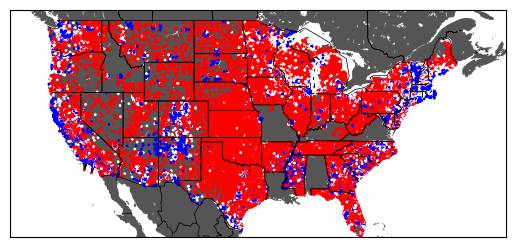

In [227]:
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
m = Basemap(
        projection='merc',
        llcrnrlon=-130,
        llcrnrlat=25,
        urcrnrlon=-60,
        urcrnrlat=50,
        lat_ts=0,
        resolution='i',
        suppress_ticks=True)

names=list(dic.keys())
lats,lons = np.array(list(dic.values())).T

# convert lat and lon to map projection
mx,my=m(lons,lats)

# The NetworkX part
# put map projection coordinates in pos dictionary
G=nx.Graph()
G.add_edge('a','b')
pos={}
pos['a']=(mx[0],my[0])
pos['b']=(mx[1],my[1])

G=nx.Graph()
pos={}

for i in range(len(parties)):
    if parties[i]=='dem':
        G.add_node(names[i],color='blue')
    elif parties[i]=='rep':
        G.add_node(names[i],color='red')
    else:
        G.add_node(names[i],color='white')
    pos[names[i]]=mx[i],my[i]
    
print(list(G.nodes)[:10])


demcounts=parties.count('dem')
repcounts=parties.count('rep')
print((demcounts/(repcounts+demcounts))*100)

for state in closest_states:
    statex=state[0]
    for i in state[1]:
        G.add_edge(statex,i)


#draw
nx.draw_networkx(G,pos,node_size=1,node_color=[G.nodes[i]['color'] for i in G.nodes],with_labels=False)

# Now draw the map
m.drawcountries()
m.drawstates()
m.fillcontinents(color='#555555')

plt.show()


In [219]:

import community as community_louvain

# Create a graph
G = nx.karate_club_graph()

# Detect communities using the Louvain method
partition = community_louvain.best_partition(G)

# Compute the modularity
modularity = community_louvain.modularity(partition, G)
print(f"Modularity: {modularity}")

Modularity: 0.4438541256723075


In [228]:
import networkx as nx
import community as community_louvain

# Extract subnetwork with nodes of type 'A'

subG = G.subgraph([n for n in G if G.nodes[n]['color'] == 'blue'])
# Apply the Louvain community detection algorithm
partition = community_louvain.best_partition(subG)

# Calculate the modularity
modularity = community_louvain.modularity(partition, subG)
print("Modularity of the subnetwork is:", modularity)

Modularity of the subnetwork is: 0.9886762200153711


In [231]:
subG = G.subgraph([n for n in G if G.nodes[n]['color'] == 'blue'])
len(subG)

56702

In [114]:
from collections import Counter
counter = Counter([G.nodes[i]['color'] for i in G.nodes])

print(counter['white']/sum(list(counter.values()))*100)
print(counter['red']/sum(list(counter.values()))*100)
print(counter['blue']/sum(list(counter.values()))*100)
print(len(G.nodes))

22.112472373052473
39.208436792272636
38.67909083467489
146596


In [87]:
demcounts/gjdf.shape[0]

0.4990586373434473

In [57]:
G.nodes['05047-1-A (Oz Wd 1)']
G.nodes

NodeView(('05047-1-A (Oz Wd 1)', '05149-11 - Dutch Creek', '05081-Franklin Township', '05027-McNeil City', '05027-Taylor Township', '05065-Franklin City', '05067-36 - Newport Ward 2-C', '05097-01 - ALAMO', '05013-Dr. Rhine Park', '05049-Cherokee Village'))

In [63]:
[G.nodes[i]['color'] for i in G.nodes]

['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red']

In [48]:
len(avg_coords)
avg_coords[:10]

xs=[]
ys=[]
for i in avg_coords:
    xs.append(i[0])
    ys.append(i[1])

len(xs)

10000

In [41]:
avg_coords[0][0]

-93.8396680006466

In [42]:
avg_coords[0][1]

35.48916421942343

In [80]:

if type(features[1])=='shapely.geometry.polygon.Polygon':
    print('ok')

In [85]:
isinstance(features[0],MultiPolygon)

True

In [67]:
features=(gjdf['geometry'])[0]
#features[0]
features
type(features)

shapely.geometry.multipolygon.MultiPolygon

In [70]:
features.geoms[4].exterior.coords

In [69]:
len(features.geoms)

5